# Exploratory Data Analysis
---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# shows plots in jupyter notebook
%matplotlib inline

# set plot style
sns.set(color_codes=True)

In [2]:
client_df = pd.read_csv('../data/client_data.csv')
price_df = pd.read_csv('../data/price_data.csv')

In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
list(client_df.columns)

['id',
 'channel_sales',
 'cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'date_activ',
 'date_end',
 'date_modif_prod',
 'date_renewal',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_off_peak',
 'forecast_price_energy_peak',
 'forecast_price_pow_off_peak',
 'has_gas',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'origin_up',
 'pow_max',
 'churn']

In [5]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
list(price_df.columns)

['id',
 'price_date',
 'price_off_peak_var',
 'price_peak_var',
 'price_mid_peak_var',
 'price_off_peak_fix',
 'price_peak_fix',
 'price_mid_peak_fix']

In [7]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [8]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [9]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [10]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


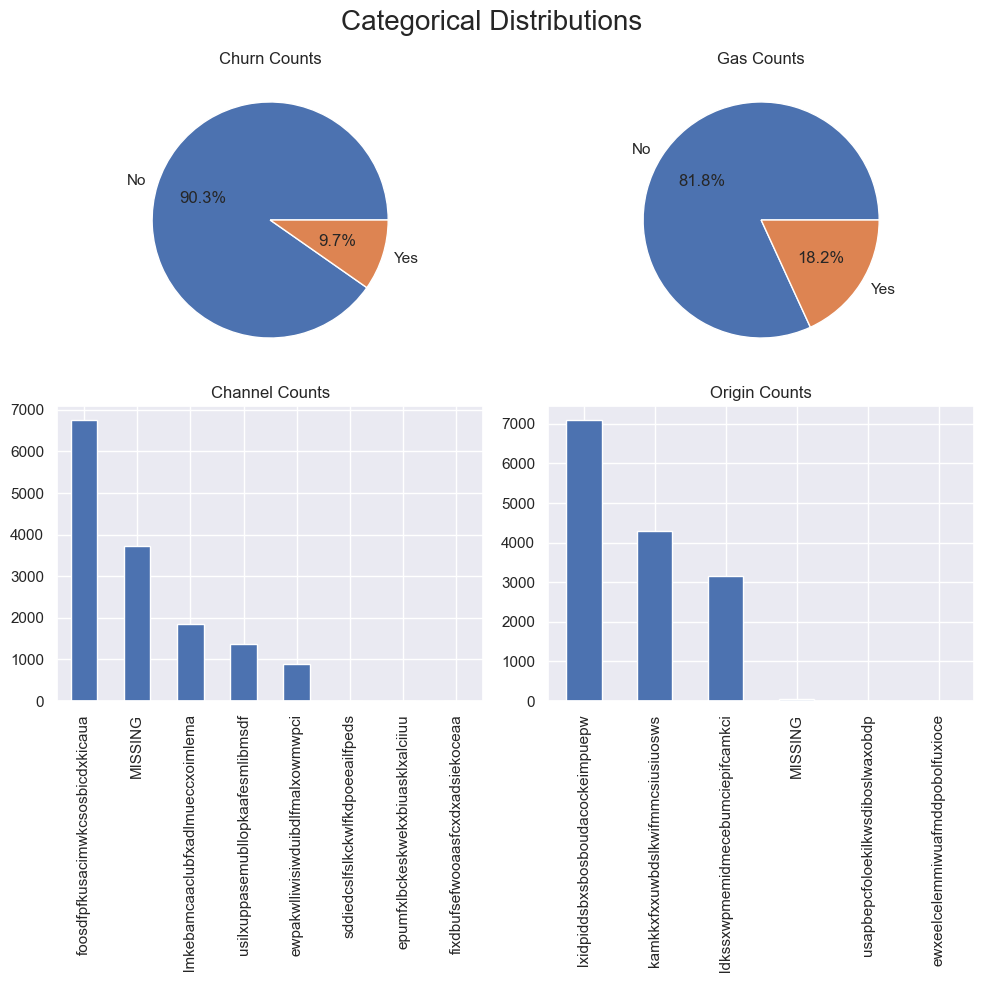

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

client_df['churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Churn Counts', ylabel='', labels=['No', 'Yes'], ax=axes[0, 0])
client_df['has_gas'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Gas Counts', ylabel='', labels=['No', 'Yes'], ax=axes[0, 1])
client_df['channel_sales'].value_counts().plot(kind='bar', title='Channel Counts', xlabel='',ax=axes[1, 0])
client_df['origin_up'].value_counts().plot(kind='bar', title='Origin Counts', xlabel='',ax=axes[1, 1])

plt.suptitle('Categorical Distributions', fontsize=20)
plt.tight_layout()
plt.savefig('../figures/categorical_distributions.png')
plt.show()

In [143]:
def contingency_plot(df, col1, col2, title, xlabel, ax):
    '''
    Plot a normalized stacked bar chart of the observed frequencies of two categorical variables.
    '''
    contingency_table = pd.crosstab(df[col1], df[col2])
    print(contingency_table, '\r\n\r\n')
    normalized_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
    normalized_table.plot(kind='bar', stacked=True, ax=ax)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Proportion')

churn        0     1
has_gas             
f        10753  1202
t         2434   217 


churn                                0    1
channel_sales                              
MISSING                           3442  283
epumfxlbckeskwekxbiuasklxalciiuu     3    0
ewpakwlliwisiwduibdlfmalxowmwpci   818   75
fixdbufsefwooaasfcxdxadsiekoceaa     2    0
foosdfpfkusacimwkcsosbicdxkicaua  5934  820
lmkebamcaaclubfxadlmueccxoimlema  1740  103
sddiedcslfslkckwlfkdpoeeailfpeds    11    0
usilxuppasemubllopkaafesmlibmsdf  1237  138 


churn                                0    1
origin_up                                  
MISSING                             60    4
ewxeelcelemmiwuafmddpobolfuxioce     1    0
kamkkxfxxuwbdslkwifmmcsiusiuosws  4036  258
ldkssxwpmemidmecebumciepifcamkci  2884  264
lxidpiddsbxsbosboudacockeimpuepw  6204  893
usapbepcfoloekilkwsdiboslwaxobdp     2    0 




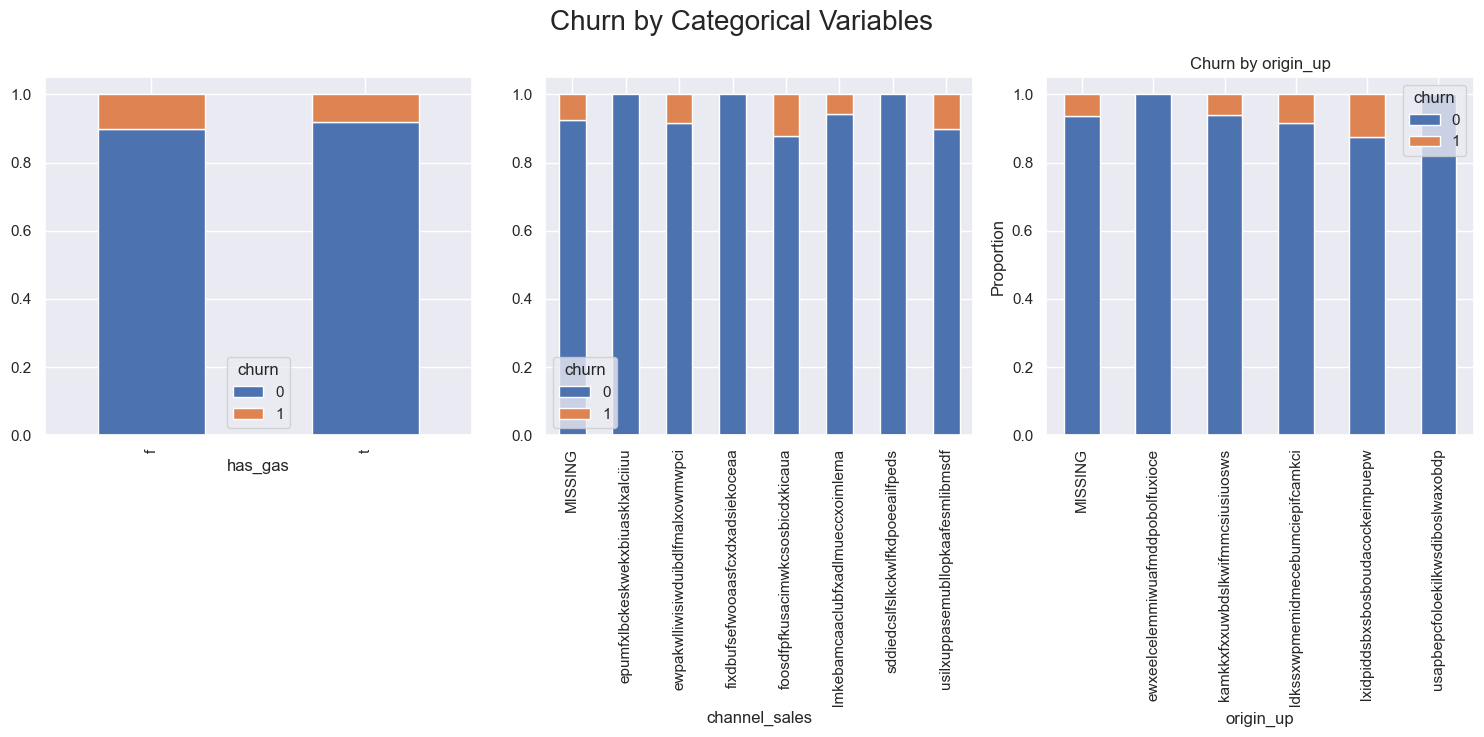

In [144]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7.5))

categories = ['has_gas', 'channel_sales', 'origin_up']
for i, category in enumerate(categories):
    contingency_plot(client_df, category, 'churn', f'Churn by {category}', category, ax=axes[i])

plt.suptitle('Churn by Categorical Variables', fontsize=20)
plt.tight_layout()
plt.savefig('../figures/contingency_plots.png')
plt.show()

In [145]:
from scipy.stats import chi2_contingency

def chi2_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-square statistic: {chi2:.2f}')
    print(f'p-value: {p:.4f}')

In [182]:
for category in categories:
    print(f'Churn by {category}')
    chi2_test(client_df, category, 'churn')
    print('\r\n')

Churn by has_gas
Chi-square statistic: 8.43
p-value: 0.0037


Churn by channel_sales
Chi-square statistic: 103.78
p-value: 0.0000


Churn by origin_up
Chi-square statistic: 141.34
p-value: 0.0000




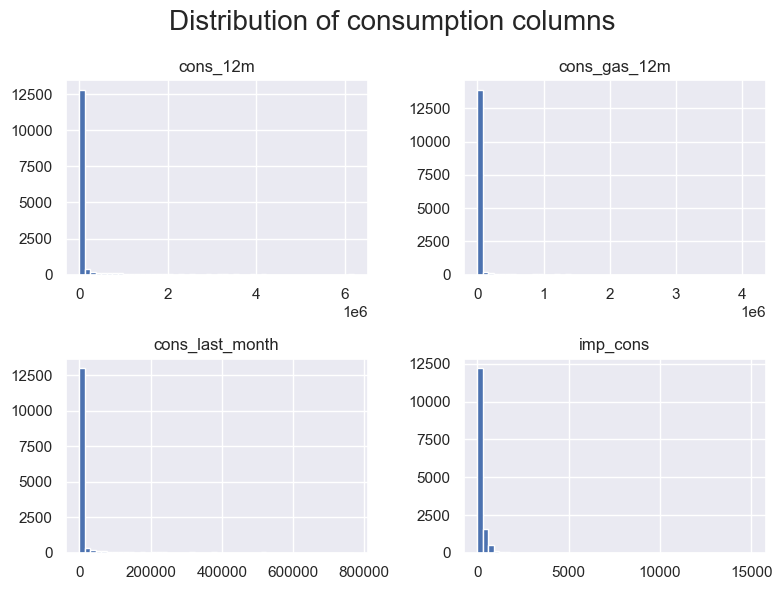

In [183]:
# histogram of consumption columns
consumption_columns = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons']
client_df[consumption_columns].hist(bins=50, figsize=(8,6))
plt.suptitle('Distribution of consumption columns', fontsize=20)
plt.tight_layout()
plt.show()

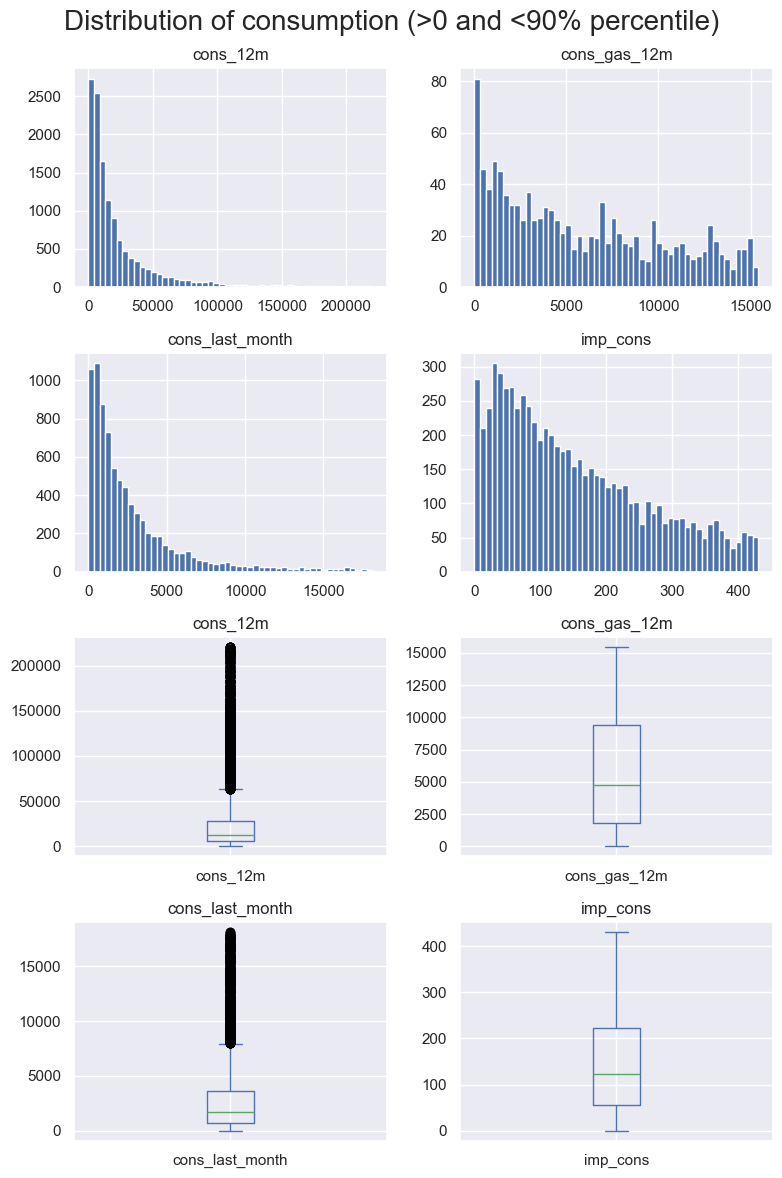

In [184]:
# filter out values above the 90% percentile
thresholds = [client_df[cons].quantile(0.90) for cons in consumption_columns]
figure, axes = plt.subplots(nrows=4, ncols=2, figsize=(8,12))

for i, cons in enumerate(consumption_columns):
    temp_serie = client_df[(client_df[cons] < thresholds[i]) & (client_df[cons] > 0)].loc[:, cons]
    temp_serie.hist(ax=axes[i//2, i%2], bins=50)
    axes[i//2, i%2].set_title(cons)
    temp_serie.plot(kind='box', ax=axes[i//2+2, i%2])
    axes[i//2+2, i%2].set_title(cons)

plt.suptitle('Distribution of consumption (>0 and <90% percentile)', fontsize=20)
plt.tight_layout()
plt.savefig('../figures/consumption_distributions.png')
plt.show()

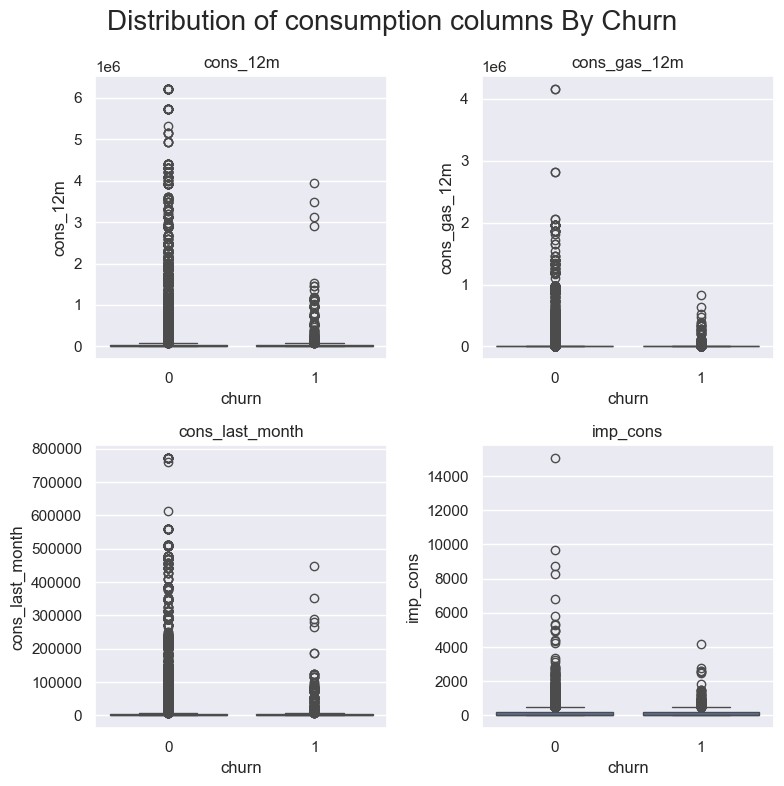

In [185]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
for i, cons in enumerate(consumption_columns):
    sns.boxplot(data=client_df, x='churn', y=cons, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(cons)

plt.suptitle('Distribution of consumption columns By Churn', fontsize=20)
plt.tight_layout()
plt.show()

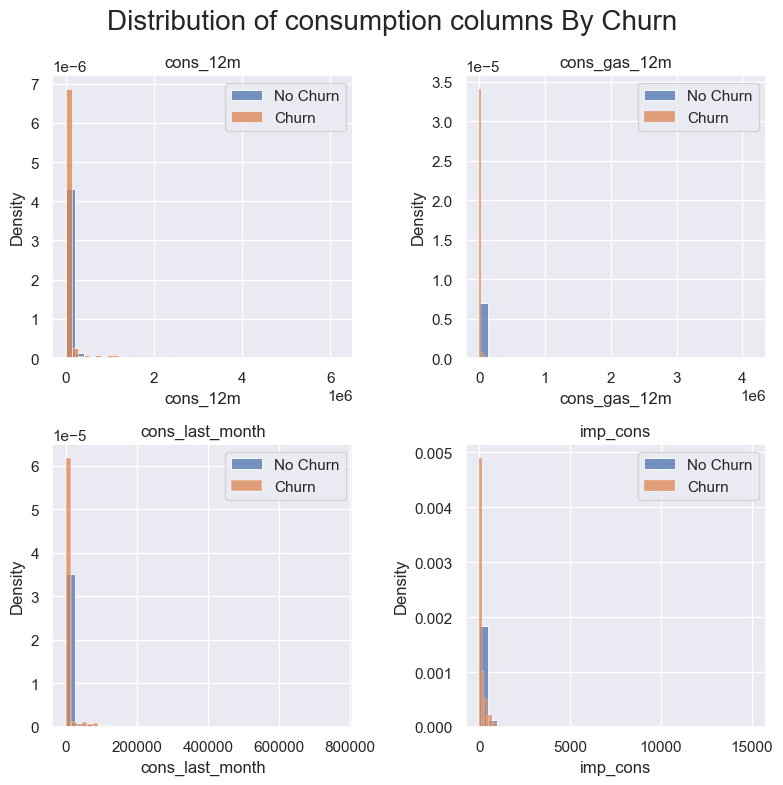

In [186]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
for i, cons in enumerate(consumption_columns):
    sns.histplot(x=client_df.loc[client_df['churn']==0][cons], stat='density', bins=30, label='No Churn', ax=axes[i//2, i%2])
    sns.histplot(x=client_df.loc[client_df['churn']==1][cons], stat='density', bins=30, label='Churn', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(cons)
    axes[i//2, i%2].legend()

plt.suptitle('Distribution of consumption columns By Churn', fontsize=20)
plt.tight_layout()
plt.savefig('../figures/consumption_distributions_by_churn.png')
plt.show()

In [187]:
forecasted_consumption_columns = ['forecast_cons_12m', 'forecast_cons_year']
forecasted_price_columns = ['forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak']

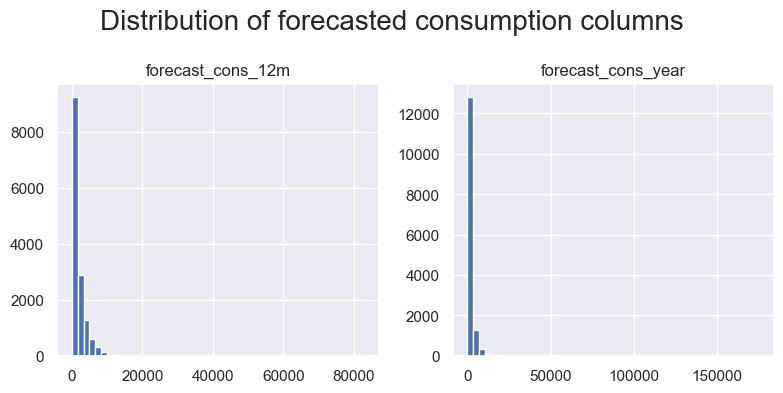

In [188]:
client_df[forecasted_consumption_columns].hist(bins=50, figsize=(8,4))
plt.suptitle('Distribution of forecasted consumption columns', fontsize=20)
plt.tight_layout()
plt.show()

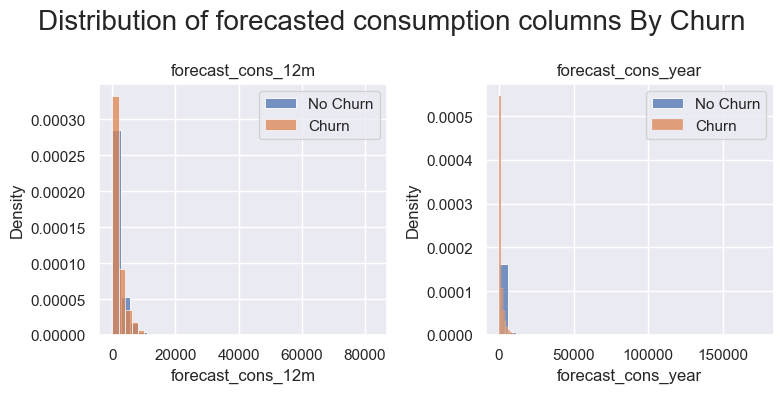

In [189]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
for i, cons in enumerate(forecasted_consumption_columns):
    sns.histplot(x=client_df.loc[client_df['churn']==0][cons], stat='density', bins=30, label='No Churn', ax=axes[i])
    sns.histplot(x=client_df.loc[client_df['churn']==1][cons], stat='density', bins=30, label='Churn', ax=axes[i])
    axes[i].set_title(cons)
    axes[i].legend()
plt.suptitle('Distribution of forecasted consumption columns By Churn', fontsize=20)
plt.tight_layout()
plt.savefig('../figures/forecasted_consumption_distributions_by_churn.png')
plt.show()

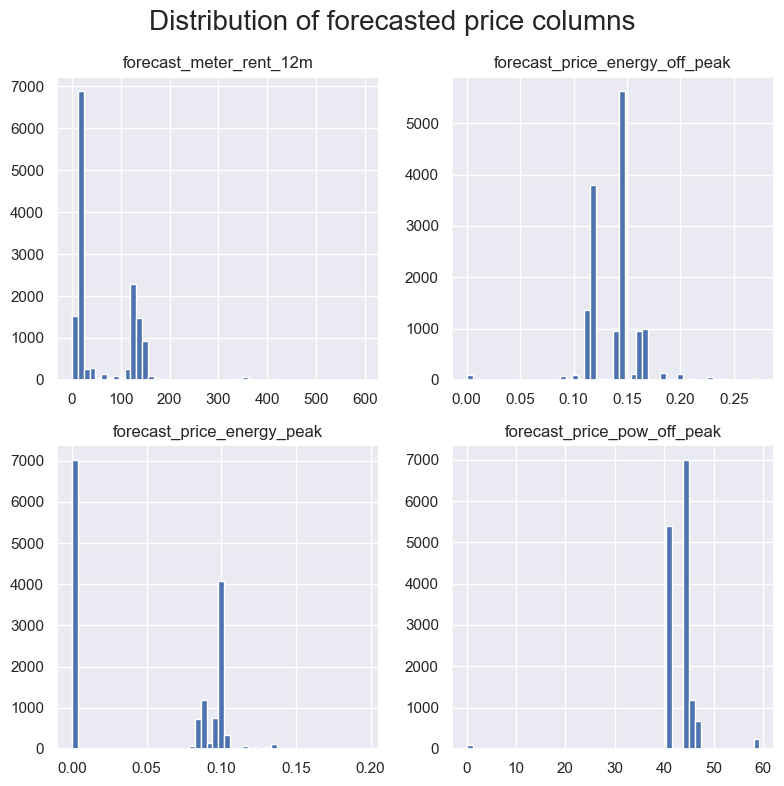

In [154]:
client_df[forecasted_price_columns].hist(bins=50, figsize=(8,8))
plt.suptitle('Distribution of forecasted price columns', fontsize=20)
plt.tight_layout()
plt.show()

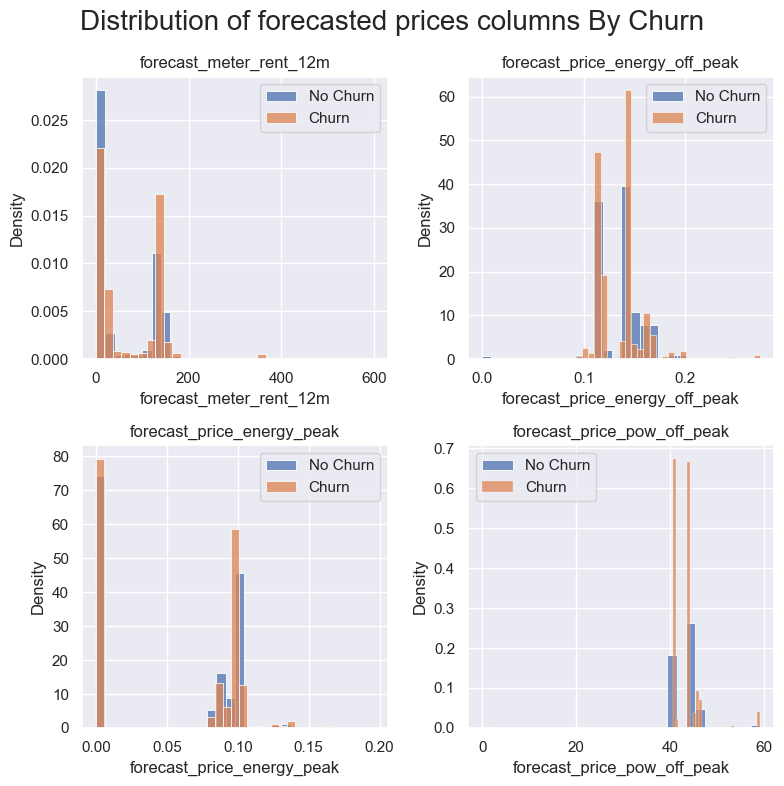

In [155]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
for i, cons in enumerate(forecasted_price_columns):
    sns.histplot(x=client_df.loc[client_df['churn']==0][cons], stat='density', bins=30, label='No Churn', ax=axes[i//2, i%2])
    sns.histplot(x=client_df.loc[client_df['churn']==1][cons], stat='density', bins=30, label='Churn', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(cons)
    axes[i//2, i%2].legend()
plt.suptitle('Distribution of forecasted prices columns By Churn', fontsize=20)
plt.tight_layout()
plt.savefig('../figures/forecasted_prices_distributions_by_churn.png')
plt.show()

churn                         0     1
forecast_discount_energy             
0.0                       12739  1355
5.0                           1     0
10.0                          0     1
17.0                          2     0
19.0                          2     0
22.0                         40     7
23.0                          1     1
24.0                         74     9
25.0                          6     1
26.0                          5     0
28.0                         87    15
30.0                        230    30 




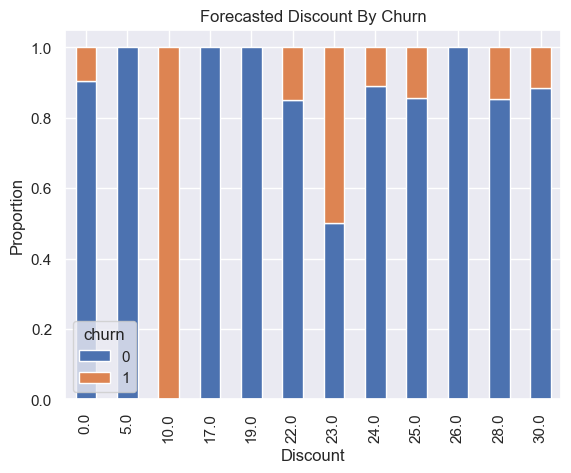

In [156]:
contingency_plot(client_df, 'forecast_discount_energy', 'churn', 'Forecasted Discount By Churn', 'Discount', ax=None)
plt.savefig('../figures/forecasted_discount_by_churn.png')
plt.show()

In [157]:
margin_columns = ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']

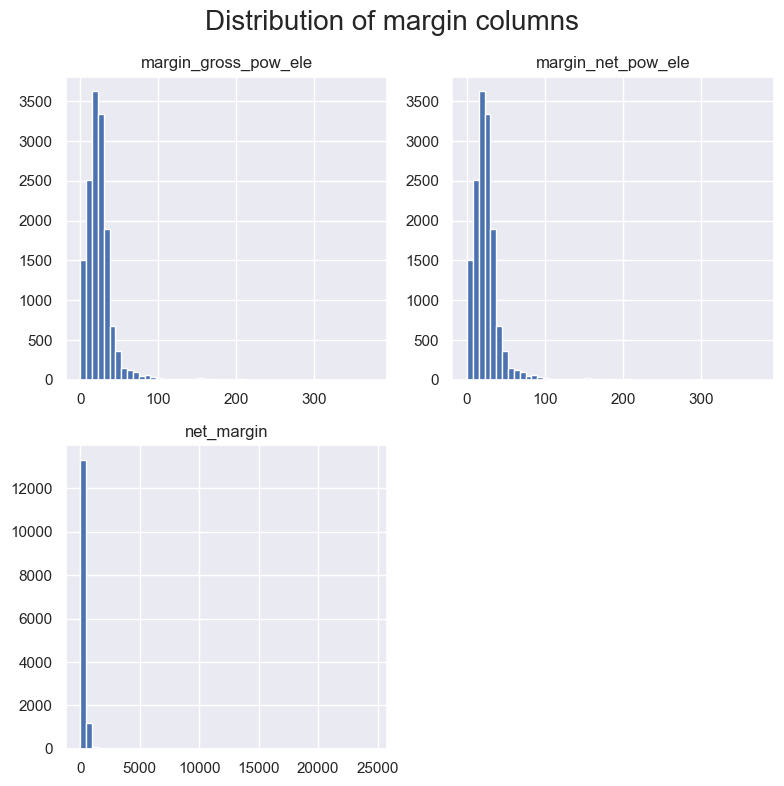

In [158]:
client_df[margin_columns].hist(bins=50, figsize=(8,8))
plt.suptitle('Distribution of margin columns', fontsize=20)
plt.tight_layout()
plt.show()

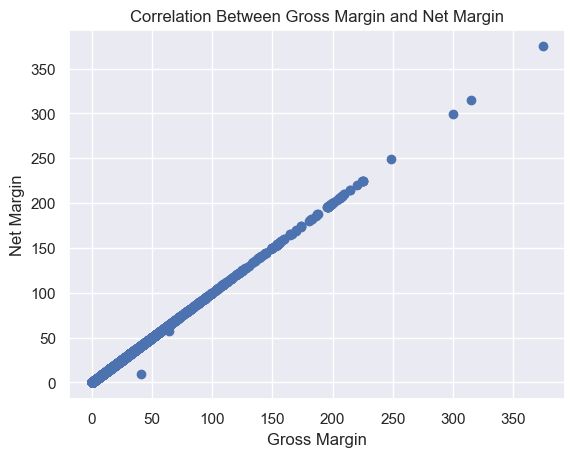

In [159]:
plt.scatter(client_df['margin_gross_pow_ele'], client_df['margin_net_pow_ele'])
plt.xlabel('Gross Margin')
plt.ylabel('Net Margin')
plt.title('Correlation Between Gross Margin and Net Margin')
plt.savefig('../figures/gross_net_margin_correlation.png')
plt.show()

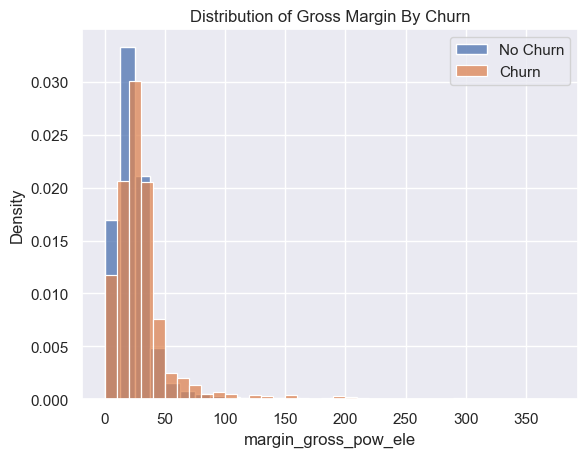

In [160]:
sns.histplot(x=client_df.loc[client_df['churn']==0]['margin_gross_pow_ele'], stat='density', bins=30, label='No Churn')
sns.histplot(x=client_df.loc[client_df['churn']==1]['margin_gross_pow_ele'], stat='density', bins=30, label='Churn')
plt.title('Distribution of Gross Margin By Churn')
plt.legend()
plt.savefig('../figures/gross_margin_by_churn.png')
plt.show()

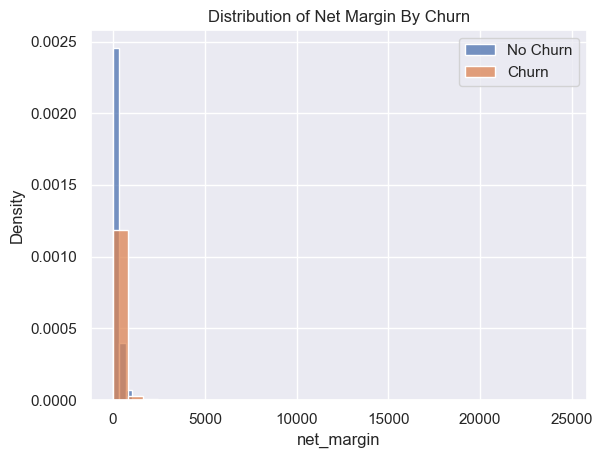

In [161]:
sns.histplot(x=client_df.loc[client_df['churn']==0]['net_margin'], stat='density', bins=30, label='No Churn')
sns.histplot(x=client_df.loc[client_df['churn']==1]['net_margin'], stat='density', bins=30, label='Churn')
plt.title('Distribution of Net Margin By Churn')
plt.legend()
plt.savefig('../figures/net_margin_by_churn.png')
plt.show()

churn            0     1
nb_prod_act             
1            10290  1141
2             2237   208
3              471    52
4              135    15
5               28     3
6                8     0
8                4     0
9               11     0
10               2     0
32               1     0 




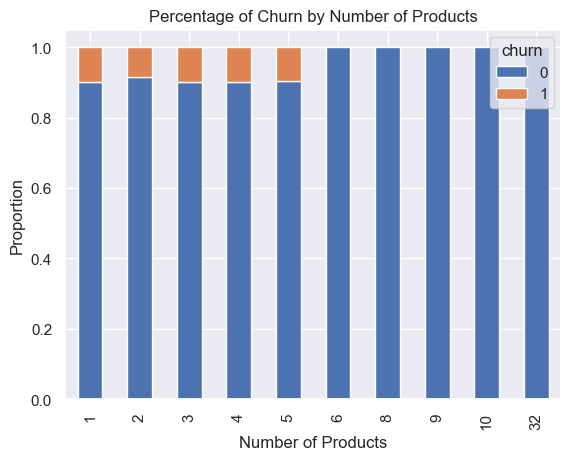

In [162]:
contingency_plot(client_df, 'nb_prod_act', 'churn', 'Percentage of Churn by Number of Products', 'Number of Products', ax=None)
plt.savefig('../figures/churn_by_number_of_products.png')
plt.show()

churn               0    1
num_years_antig           
1                   1    0
2                   8    3
3                2104  329
4                3510  472
5                2117  200
6                4430  339
7                 467   42
8                  98    5
9                  91    1
10                 77    4
11                173   12
12                 99   11
13                 12    1 




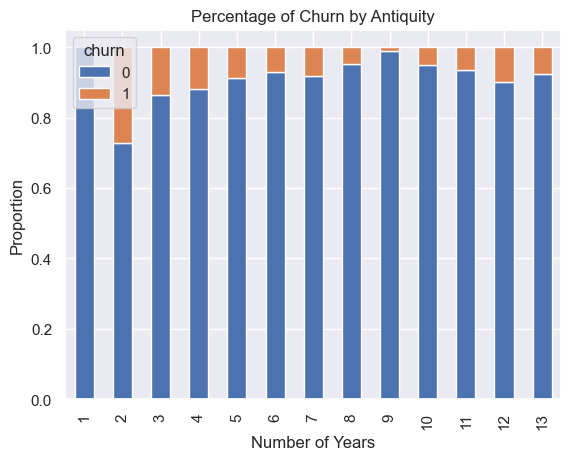

In [163]:
contingency_plot(client_df, 'num_years_antig', 'churn', 'Percentage of Churn by Antiquity', 'Number of Years', ax=None)
plt.savefig('../figures/churn_by_antiquity.png')
plt.show()

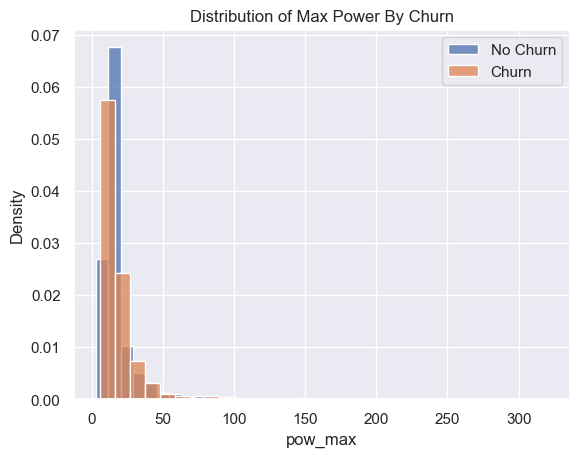

In [164]:
sns.histplot(x=client_df.loc[client_df['churn']==0]['pow_max'], stat='density', bins=30, label='No Churn')
sns.histplot(x=client_df.loc[client_df['churn']==1]['pow_max'], stat='density', bins=30, label='Churn')
plt.title('Distribution of Max Power By Churn')
plt.legend()
plt.savefig('../figures/max_power_by_churn.png')
plt.show()

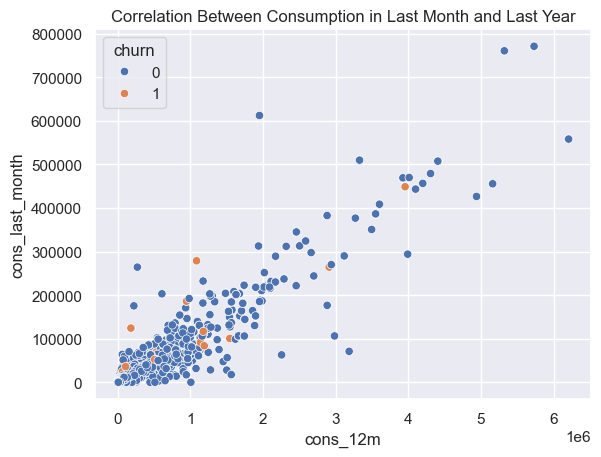

In [165]:
sns.scatterplot(data=client_df, x='cons_12m', y='cons_last_month', hue='churn')
plt.title('Correlation Between Consumption in Last Month and Last Year')
plt.savefig('../figures/previous_consumption_correlation.png')
plt.show()

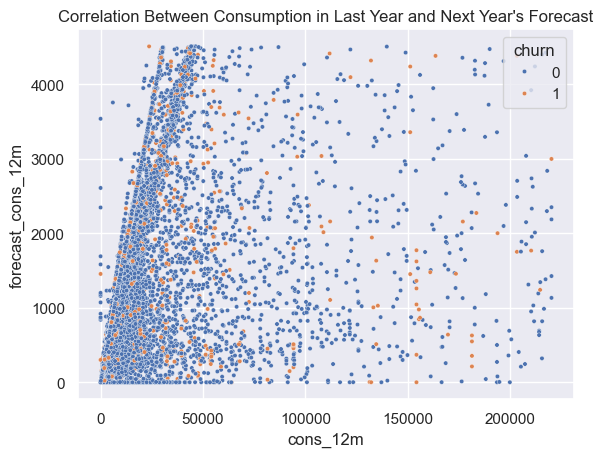

In [166]:
sns.scatterplot(
    data=client_df.loc[(client_df['cons_12m']<client_df['cons_12m'].quantile(0.9))&(client_df['forecast_cons_12m']<client_df['forecast_cons_12m'].quantile(0.9))],
    x='cons_12m',
    y='forecast_cons_12m',
    hue='churn',
    s=10
)
plt.title('Correlation Between Consumption in Last Year and Next Year\'s Forecast')
plt.savefig('../figures/previous_and_next_consumption_correlation.png')
plt.show()

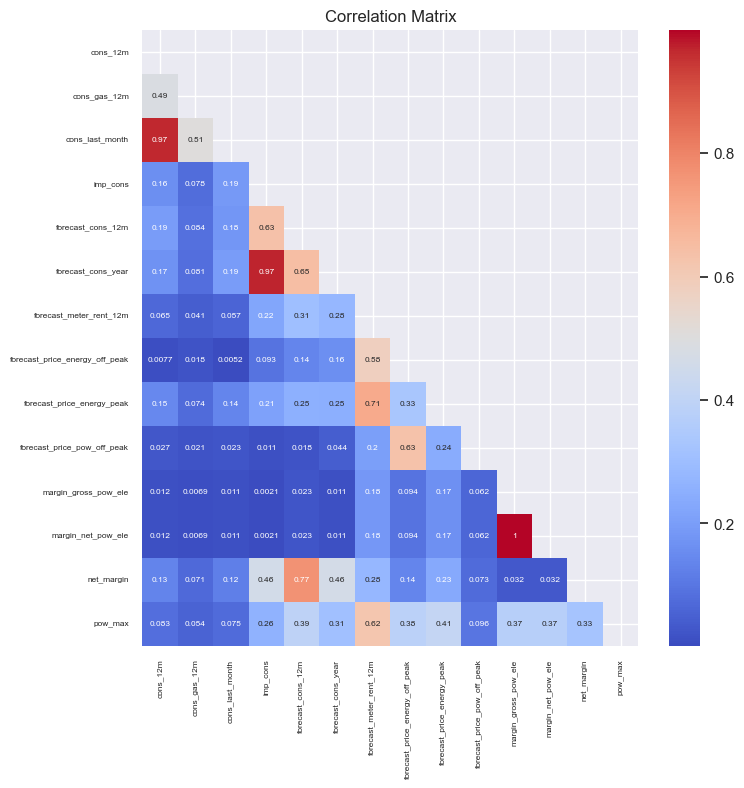

In [167]:
numerical_columns = consumption_columns + \
    forecasted_consumption_columns + \
    forecasted_price_columns + \
    margin_columns + \
    ['pow_max']

corr_matrix = np.abs(client_df[numerical_columns].corr())

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, annot_kws={"fontsize":6})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=6)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=6)
plt.title('Correlation Matrix')
plt.savefig('../figures/correlation_matrix.png')
plt.show()

In [168]:
scatter_list = [
    ('cons_last_month', 'cons_gas_12m'),
    ('forecast_cons_year', 'imp_cons'),
    ('forecast_cons_year', 'forecast_cons_12m'),
    ('forecast_price_energy_peak', 'forecast_meter_rent_12m'),
    ('forecast_price_pow_off_peak', 'forecast_price_energy_off_peak'),
    ('net_margin', 'forecast_cons_12m'),
    ('pow_max', 'forecast_meter_rent_12m')
]

In [169]:
def make_scatter(df, x, y):    
    sns.scatterplot(data=df, x=x, y=y, hue='churn', s=10)
    plt.tight_layout()
    plt.show()
    plt.clf()

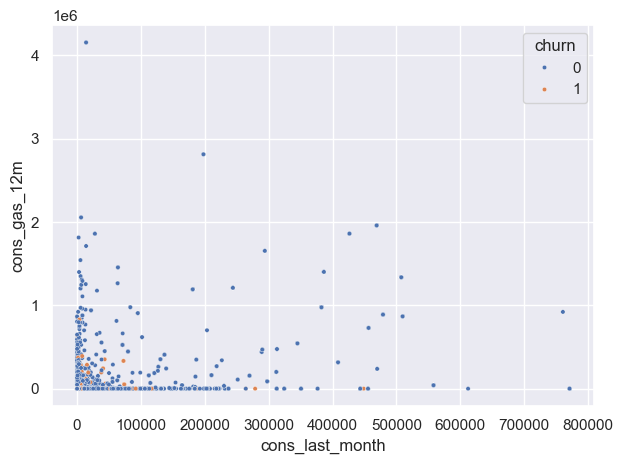

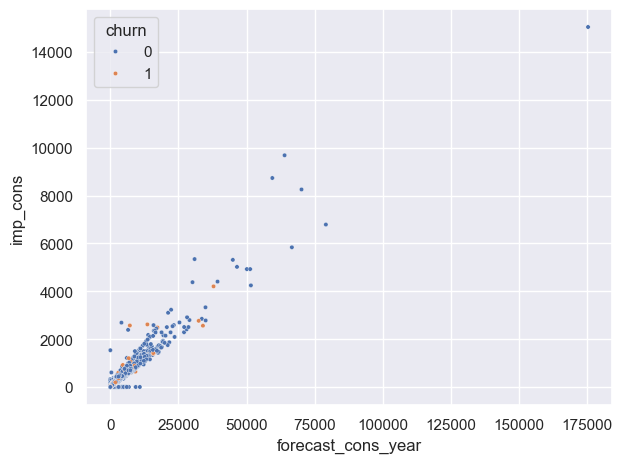

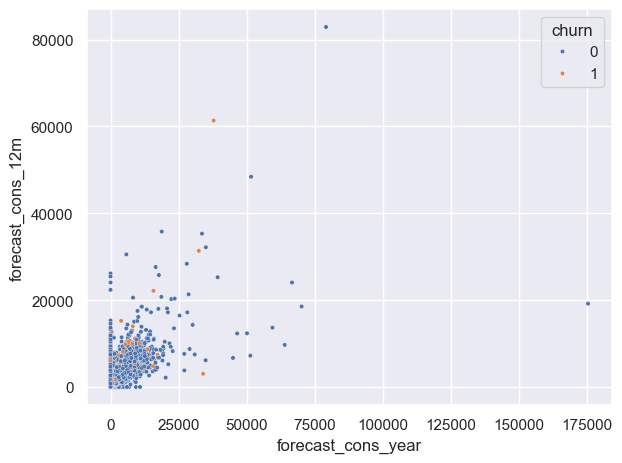

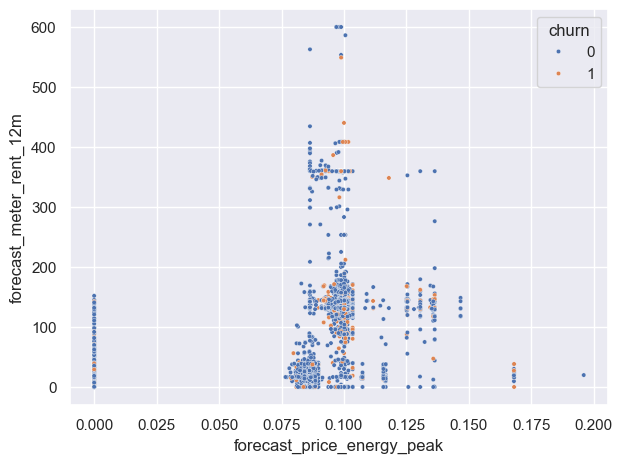

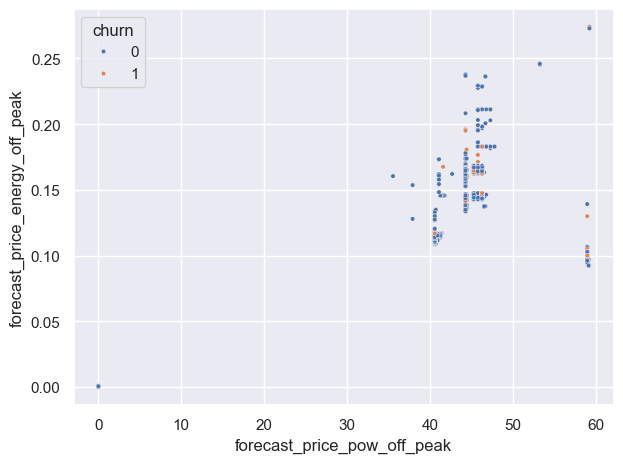

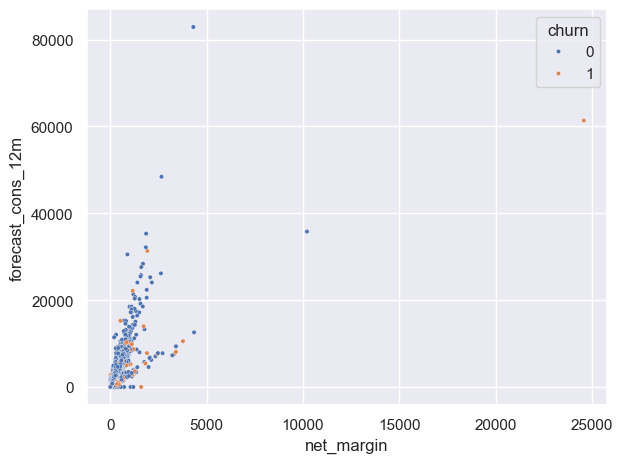

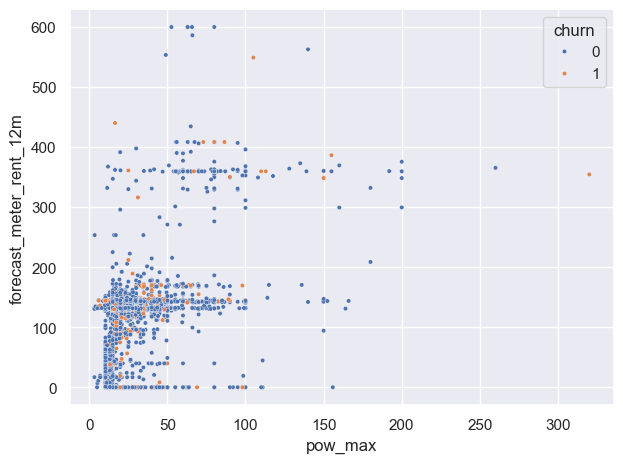

In [170]:
for x, y in scatter_list:
    make_scatter(client_df, x, y)
plt.close()

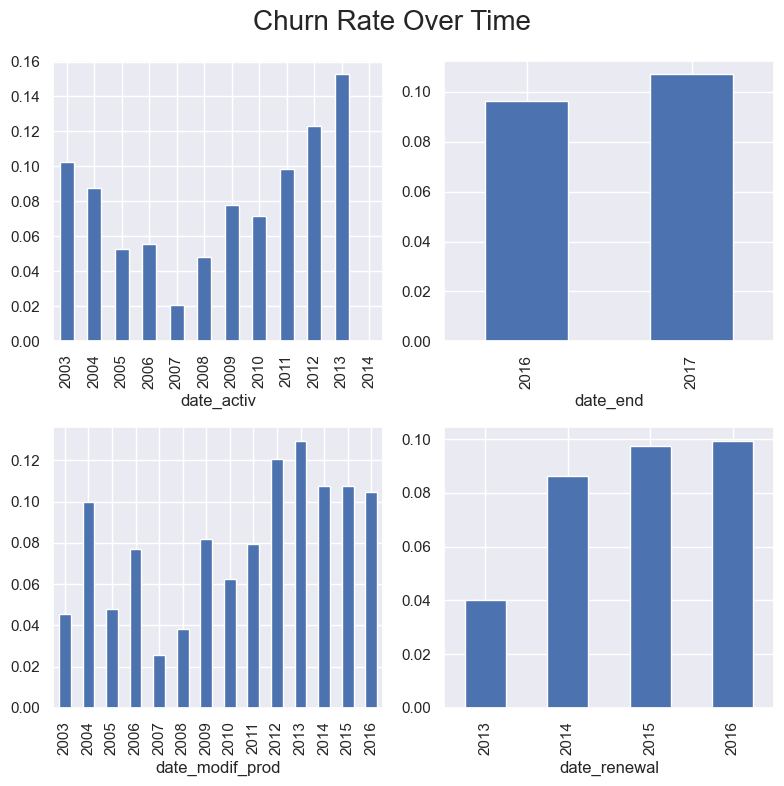

In [171]:
dates = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i, date in enumerate(dates):
    client_df[date] = pd.to_datetime(client_df[date], format='%Y-%m-%d')
    temp_df = client_df.groupby(client_df[date].dt.year)['churn'].agg(['sum','count'])
    temp_df['churn_rate'] = temp_df['sum'] / temp_df['count']
    temp_df['churn_rate'].plot(kind='bar', ax=axes[i//2, i%2])
 
plt.suptitle('Churn Rate Over Time', fontsize=20)
plt.tight_layout()
plt.savefig('../figures/churn_rate_over_time.png')
plt.show()

In [172]:
# convert date columns to datetime
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

In [173]:
churned_clients = client_df.loc[client_df['churn']==1, 'id'].unique()
non_churned_clients = client_df.loc[client_df['churn']==0, 'id'].unique()

In [174]:
churn_price_df = price_df.loc[price_df['id'].isin(churned_clients)]
non_churn_price_df = price_df.loc[price_df['id'].isin(non_churned_clients)]

In [175]:
def plot_price_over_time(col, period, figname):
    fig = plt.figure(figsize=(10,8))
    gs = GridSpec(2, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1], sharey=ax2)

    price_df.groupby('price_date')[col].mean().plot(ax=ax1, xlabel='')
    ax1.set_title(f'Average Price Over Time ({period} period)')

    churn_price_df.groupby('price_date')[col].mean().plot(label='Churned', ax=ax2, xlabel='')
    ax2.set_title('Churned')

    non_churn_price_df.groupby('price_date')[col].mean().plot(label='Non-churned', ax=ax3, xlabel='')
    ax3.set_title('Non-churned')

    plt.tight_layout()
    plt.savefig(f'../figures/{figname}.png')
    plt.show()

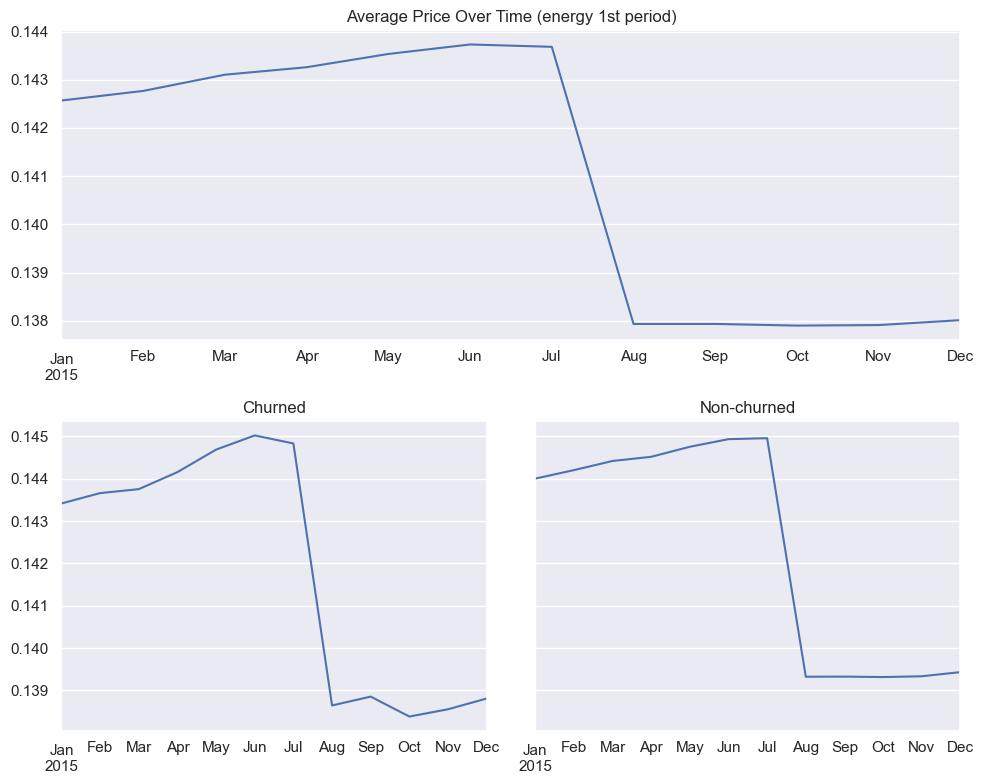

In [176]:
plot_price_over_time('price_off_peak_var', 'energy 1st', 'price_1st_period_over_time')

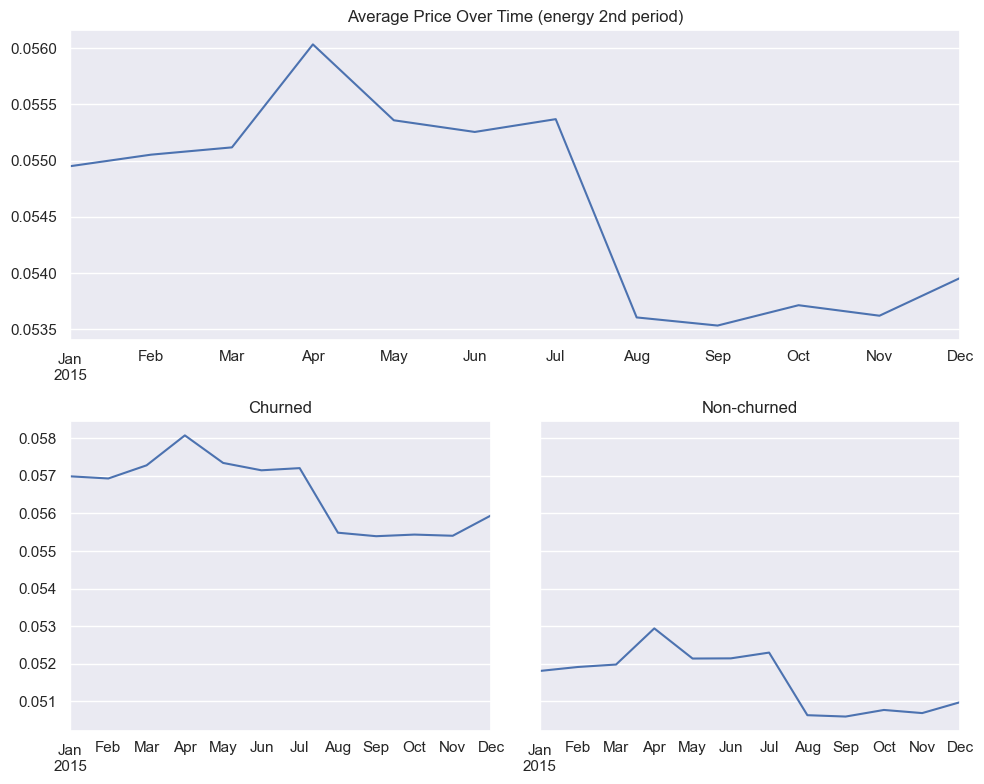

In [177]:
plot_price_over_time('price_peak_var', 'energy 2nd', 'price_2nd_period_over_time')

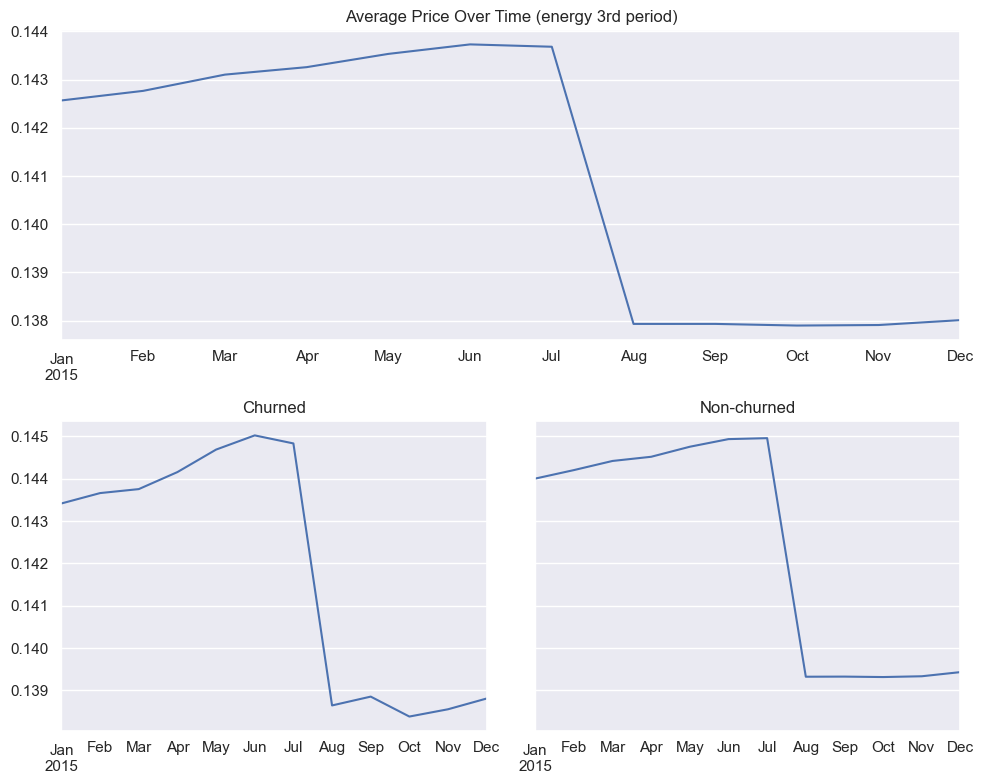

In [178]:
plot_price_over_time('price_off_peak_var', 'energy 3rd', 'price_3rd_period_over_time')

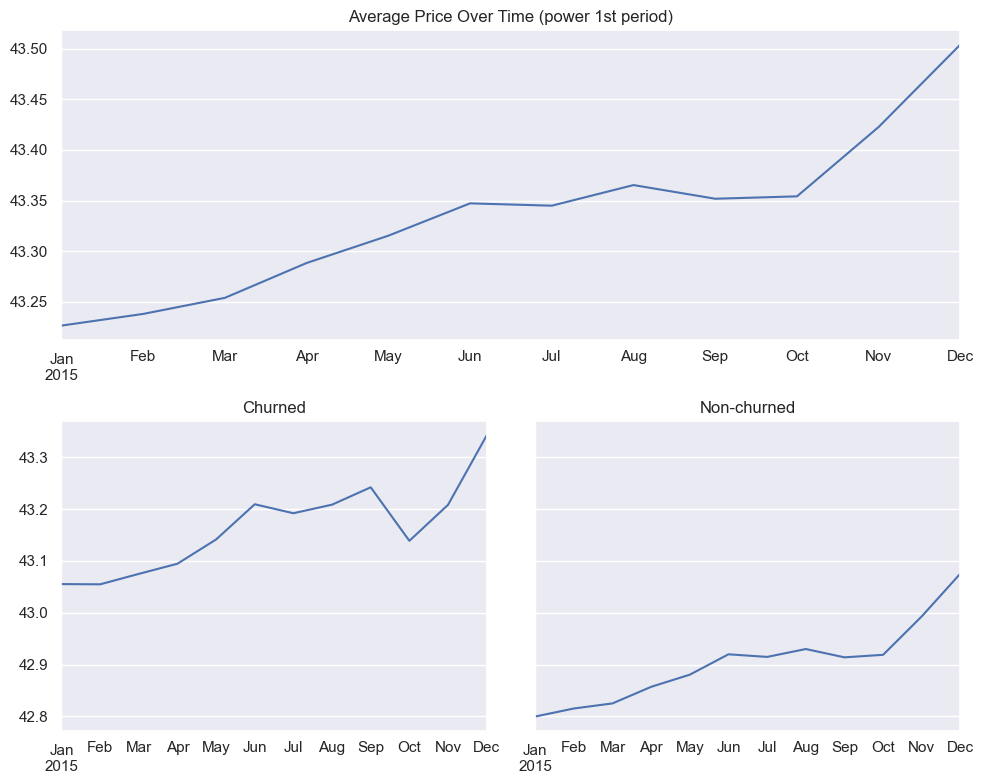

In [179]:
plot_price_over_time('price_off_peak_fix', 'power 1st', 'price_1st_fixed_period_over_time')

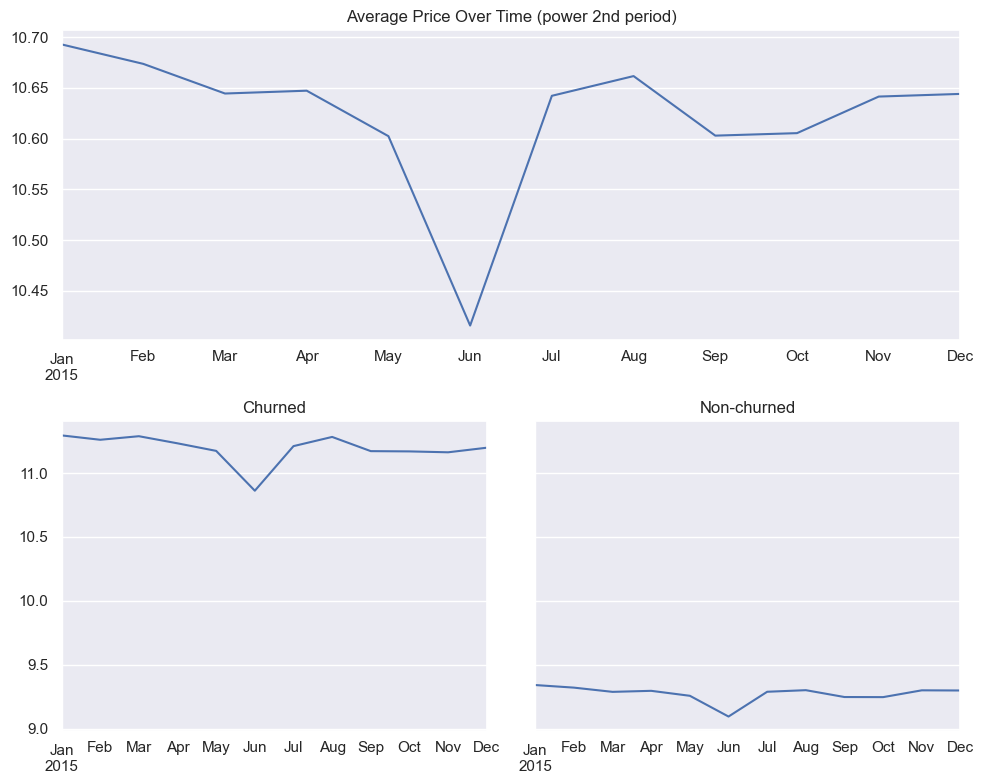

In [180]:
plot_price_over_time('price_peak_fix', 'power 2nd', 'price_2nd_fixed_period_over_time')

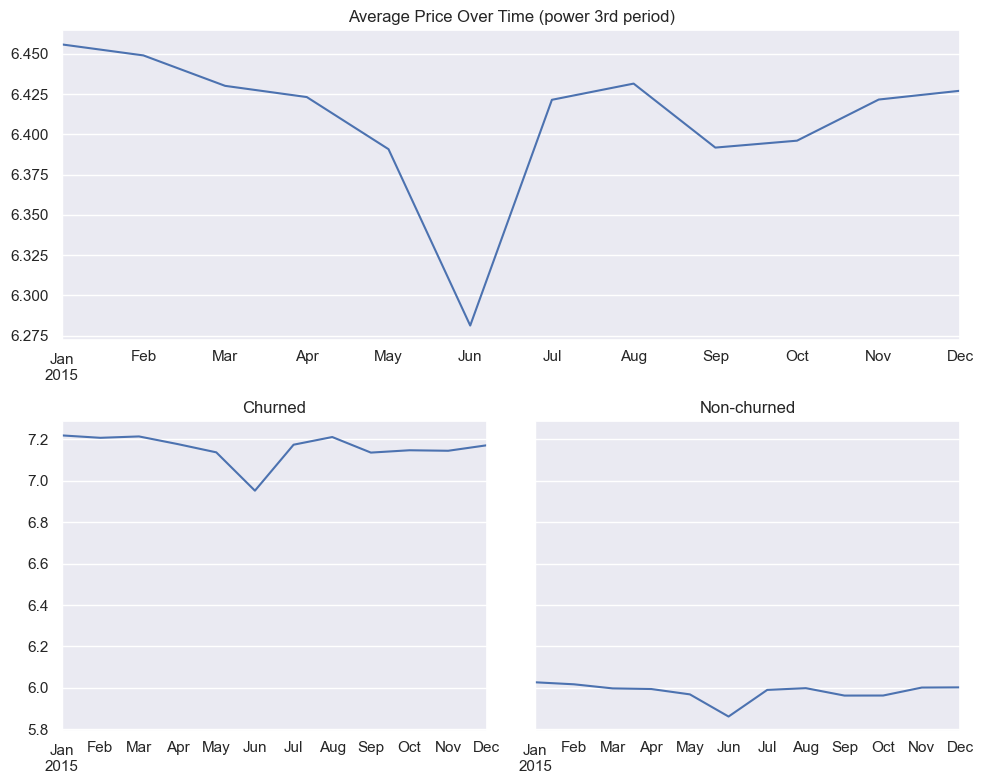

In [181]:
plot_price_over_time('price_mid_peak_fix', 'power 3rd', 'price_3rd_fixed_period_over_time')